<a href="https://colab.research.google.com/github/kaviha2006/student-burnout-prediction/blob/main/product_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Ratings Data:
   user_id product  rating
0        1     Bag       5
1        1   Shoes       4
2        1   Watch       5
3        2     Bag       5
4        2   Shoes       3
5        3   Shoes       4
6        3   Watch       5
7        4     Bag       2
8        4   Watch       5
9        5   Shoes       4


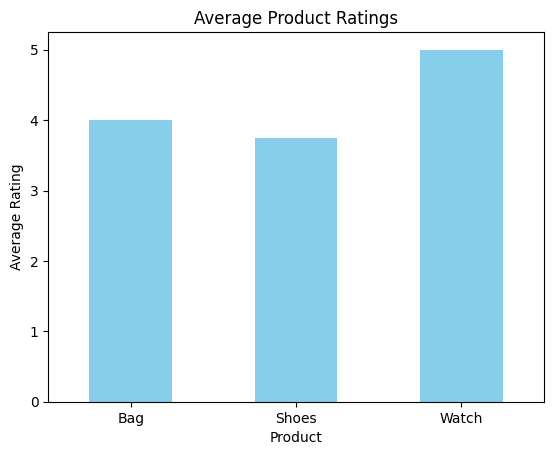


User-Product Matrix:
product  Bag  Shoes  Watch
user_id                   
1        5.0    4.0    5.0
2        5.0    3.0    0.0
3        0.0    4.0    5.0
4        2.0    0.0    5.0
5        0.0    4.0    0.0

User-User Similarity Matrix:
user_id         1         2         3         4         5
user_id                                                  
1        1.000000  0.781071  0.788170  0.800013  0.492366
2        0.781071  1.000000  0.321403  0.318465  0.514496
3        0.788170  0.321403  1.000000  0.725018  0.624695
4        0.800013  0.318465  0.725018  1.000000  0.000000
5        0.492366  0.514496  0.624695  0.000000  1.000000
Recommended products for User 2:
['Watch']


In [6]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Sample dataset (user-product ratings)
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 4, 4, 5],
    'product': ['Bag', 'Shoes', 'Watch',
                'Bag', 'Shoes',
                'Shoes', 'Watch',
                'Bag', 'Watch',
                'Shoes'],
    'rating': [5, 4, 5, 5, 3, 4, 5, 2, 5, 4]
}

df = pd.DataFrame(data)
print("Original Ratings Data:")
print(df)

# Step 3: Visualize average ratings per product (Bar Chart)
avg_ratings = df.groupby('product')['rating'].mean()
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Product Ratings')
plt.ylabel('Average Rating')
plt.xlabel('Product')
plt.xticks(rotation=0)
plt.show()

# Step 4: Create User-Product matrix
user_product_matrix = df.pivot_table(index='user_id', columns='product', values='rating')
user_product_matrix.fillna(0, inplace=True)
print("\nUser-Product Matrix:")
print(user_product_matrix)

# Step 5: Compute cosine similarity between users
user_similarity = cosine_similarity(user_product_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_product_matrix.index, columns=user_product_matrix.index)
print("\nUser-User Similarity Matrix:")
print(user_similarity_df)

# Step 6: Recommend products based on similar users
def recommend_products(user_id, num_recommendations=2):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    similar_users = similar_users.drop(user_id)

    user_products = set(df[df['user_id'] == user_id]['product'])

    recommendations = {}
    for sim_user in similar_users.index:
        sim_user_products = df[df['user_id'] == sim_user][['product', 'rating']]
        for _, row in sim_user_products.iterrows():
            if row['product'] not in user_products:
                if row['product'] not in recommendations:
                    recommendations[row['product']] = row['rating']
                else:
                    recommendations[row['product']] += row['rating']

    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return [product for product, score in sorted_recs[:num_recommendations]]

# Step 7: Example usage
print("Recommended products for User 2:")
print(recommend_products(2))